In [58]:
import pandas as pd
import numpy as np

In [59]:
df=pd.read_csv(r"C:\Users\shilpa\Downloads\Bharat sir_notes\Data Science\medical_insurance.csv")

In [60]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [63]:
df["sex"].replace({"male":0,"female":0},inplace=True)


In [64]:
df["smoker"].replace({"yes":1,"no":0},inplace=True)


In [65]:
df=pd.get_dummies(df,columns=["region"])

In [66]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [67]:
import matplotlib.pyplot as plt

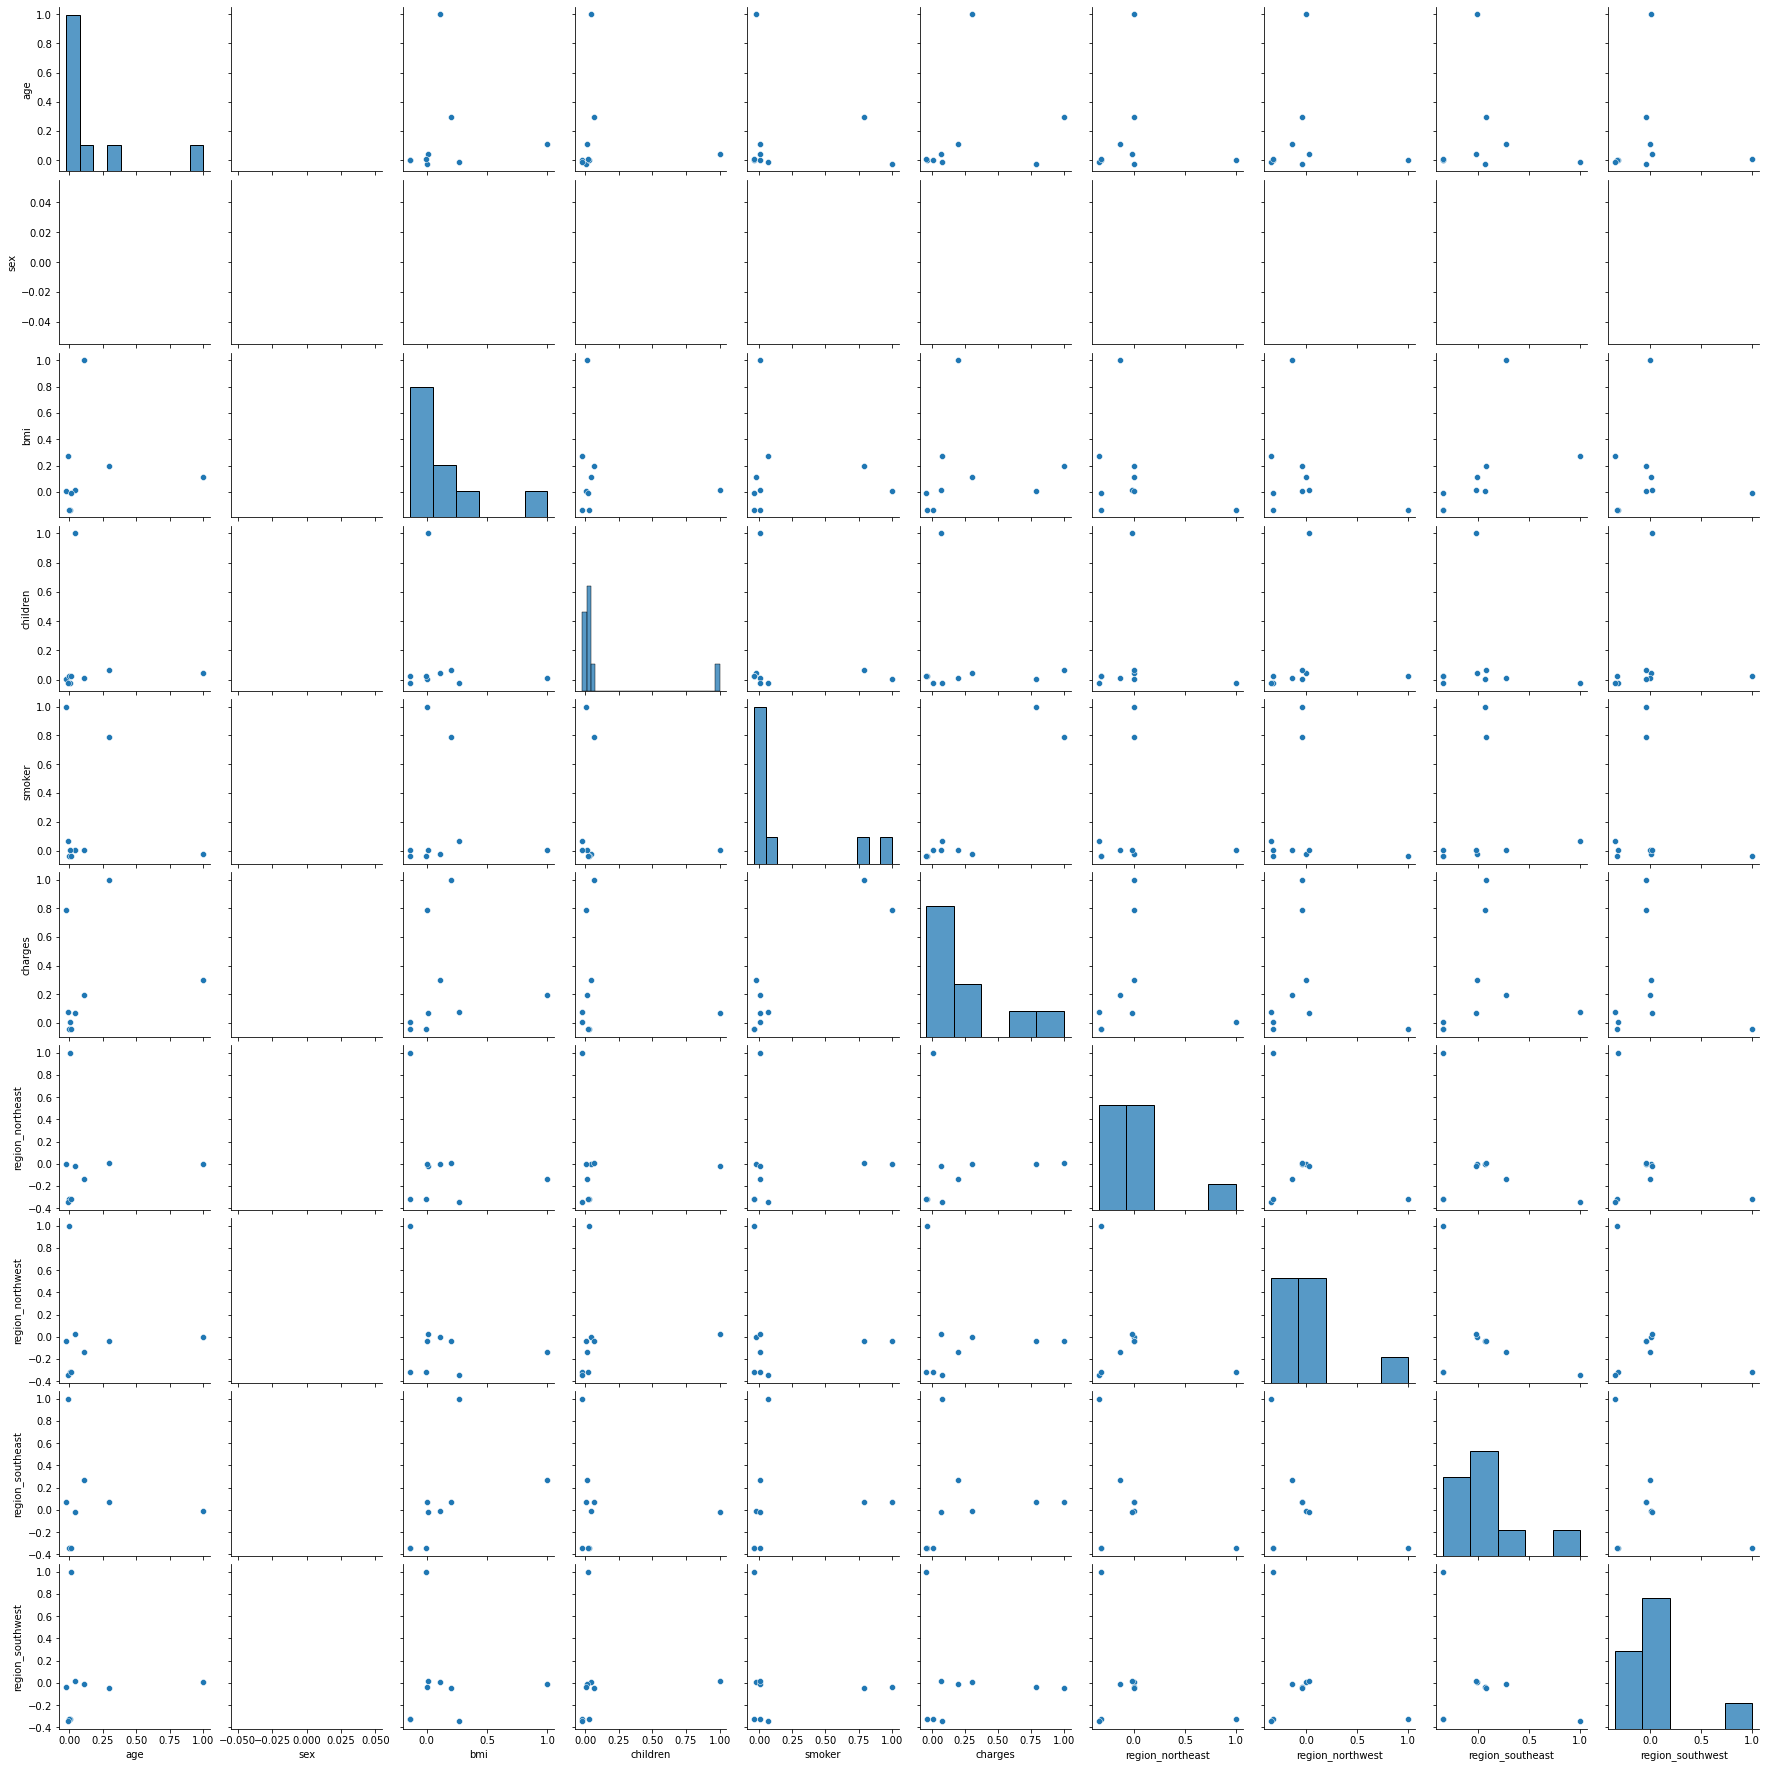

In [68]:
import seaborn as sns
sns.pairplot(df.corr())

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr=LinearRegression()


In [72]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=13)

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [96]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [97]:

#testing accuracy
mse=mean_squared_error(y_test,y_pred)
print("mse",mse)
mae=mean_absolute_error(y_test,y_pred)
print("mae",mae)
r2=r2_score(y_test,y_pred)
print("r2",r2)

mse 34037310.73983031
mae 4068.2432745766823
r2 0.7674849071176741


In [98]:
#training accuracy
y_pred_train=lr.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("mse",mse)
mae=mean_absolute_error(y_train,y_pred_train)
print("mae",mae)
r2=r2_score(y_train,y_pred_train)
print("r2",r2)

mse 37735910.337588206
mae 4332.419429179334
r2 0.7422847520586522


In [102]:
x_train.head(0).T

""
age
sex
bmi
children
smoker
region_northeast
region_northwest
region_southeast
region_southwest


In [142]:
columns_names=x.columns

In [128]:
age=45
sex="female"
bmi=5.67
children=2
smoker="no"
region="southeast"

In [129]:
test_array=np.zeros(len(x.columns))

In [130]:
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [131]:
label_column={"sex":{"male":0,"female":0},
             "smoker":{"yes":1,"no":0}}

In [132]:
test_array[0]=age
test_array[1]=label_column["sex"][sex]
test_array[2]=bmi
test_array[3]=children
test_array[4]=label_column["smoker"][smoker]

In [133]:
test_array

array([45.  ,  0.  ,  5.67,  2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [134]:
region="region_"+region

In [135]:
region

'region_southeast'

In [146]:
index=np.where(columns_names==region)[0][0]
index

7

In [147]:
test_array[index]=1

In [148]:
test_array

array([45.  ,  0.  ,  5.67,  2.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ])

In [151]:
np.around(lr.predict([test_array])[0],2)

1236.37

In [152]:
import pickle
with open("lr.pkl","wb") as f:
    pickle.dump(lr,f)

In [160]:
project_data={"sex":{"male":0,"female":0},
             "smoker":{"yes":1,"no":0},"columns":list(x.columns)}
project_data

{'sex': {'male': 0, 'female': 0},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [161]:
import json
with open ("project_data.json","w")as f:
    json.dump(project_data,f)